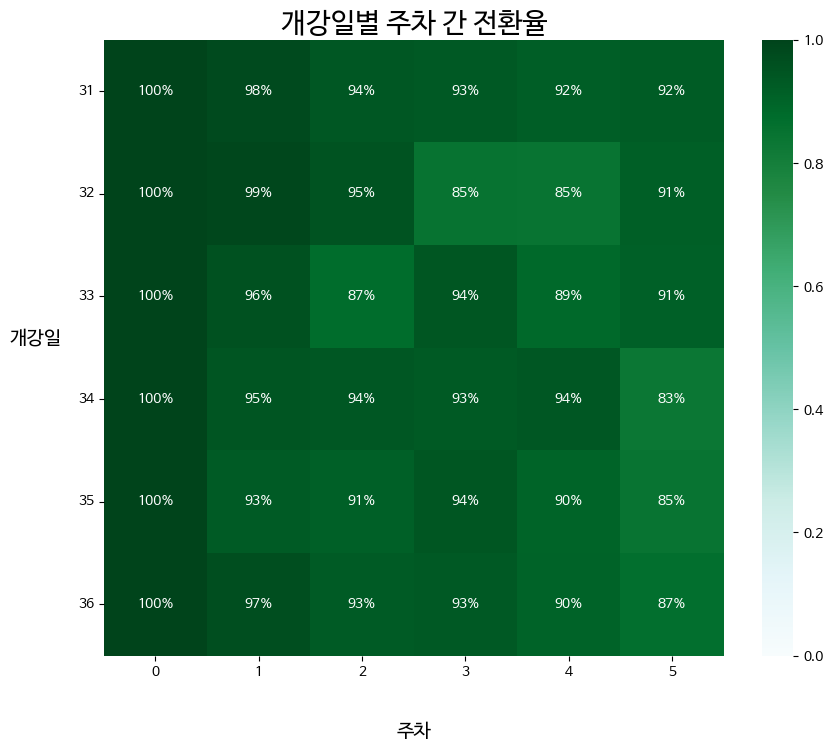

In [3]:
#라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')
sparta_data = pd.read_table('/content/cohort_data.csv',sep=',')
sparta_data.tail()

#날짜 데이터 타입 변경
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['start_time'] = pd.to_datetime(sparta_data['created_at'], format=format,infer_datetime_format=True)
sparta_data.tail()

#시작 week 구하기
sparta_data['start_week']= sparta_data['start_time'].dt.isocalendar().week
sparta_data.tail()

#시작 주 범위 알기
category_range = set(sparta_data['start_week'])
category_range

# 범주화 하기
#번주화할 데이터
progress_rate = list(sparta_data['progress_rate'])
progress_rate

#범주를 구분하는 기준 bins
bins = [0,4.11,26.03,41.10,61.64,80.82,100]

#구분한 범주의 라벨 labels
labes=[0,1,2,3,4,5]

#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts
cuts = pd.DataFrame(cuts)
cuts.tail()


# 표 합치기
sparta_data = pd.concat([sparta_data,cuts],axis=1, join='inner')


#표 인덱스 변경하기
sparta_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week',"week"]


#시작주와, 수강 주차별 기준으로 표 grouping 하기
grouping = sparta_data.groupby(['start_week','week'])

#시작주와, 수강 주차별에 해당하는 수강생 수 구하기
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)

#각 주차별 수강한 수강생 총 합 구하기
k=31
for i in range(6):
  for j in range(5, 0, -1):
    cohort_data.at[(k,j-1), 'user_id'] = int(cohort_data.at[(k,j),'user_id']) +  int(cohort_data.at[(k,j-1),'user_id'])
  k=k+1
cohort_data = cohort_data.reset_index()
cohort_data.head()


cohort_counts = cohort_data.pivot(index="start_week",
                                  columns="week",
                                  values="user_id")
cohort_counts
#과제 코드
wow = cohort_counts.copy()
x = 31
for y in range(6):
  for z in range(6):
    if z == 0:
      wow.at[x, z] = cohort_counts.at[x, z]/cohort_counts.at[x, z]
    else:
      wow.at[x, z] = cohort_counts.at[x, z]/cohort_counts.at[x, z-1]
  x += 1
wow.round(3)*100

#주차별 수강 전환율 히트맵
plt.figure(figsize=(10,8))

sns.heatmap(data=wow,
           annot=True,
           fmt='.0%',
           vmin=0,
           vmax=1,
           cmap="BuGn")



plt.title('개강일별 주차 간 전환율', fontsize=20)
plt.xlabel('주차', fontsize=14,labelpad=30)
plt.ylabel('개강일', fontsize=14,rotation=360,labelpad=30)
plt.yticks(rotation=360)

plt.show()

In [56]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,474 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire